In [2]:
 # ## 1. Import Required Libraries
import random
from math import gcd

# ## 2. Extended Euclidean Algorithm for Modular Inverse
def egcd(a, b):
    if a == 0:
        return (b, 0, 1)
    else:
        g, y, x = egcd(b % a, a)
        return (g, x - (b // a) * y, y)

def modinv(e, phi):
    g, x, _ = egcd(e, phi)
    if g != 1:
        raise Exception('Modular inverse does not exist')
    else:
        return x % phi

# ## 3. Prime Number Generation (for simplicity using small primes)
# NOTE: For real RSA use, use cryptographic libraries for secure primes.
def is_prime(n):
    if n <= 1:
        return False
    for i in range(2, int(n**0.5) + 1):
        if n % i == 0:
            return False
    return True

def generate_prime_candidate(start=100, end=300):
    while True:
        p = random.randint(start, end)
        if is_prime(p):
            return p

# ## 4. RSA Key Generation
def generate_keys():
    p = generate_prime_candidate()
    q = generate_prime_candidate()
    while q == p:
        q = generate_prime_candidate()

    n = p * q
    phi = (p - 1) * (q - 1)

    e = 65537
    if gcd(e, phi) != 1:
        # fallback if 65537 not suitable
        e = 3
        while gcd(e, phi) != 1:
            e += 2

    d = modinv(e, phi)
    return ((e, n), (d, n), p, q)

# ## 5. Encryption and Decryption
def encrypt(message, pub_key):
    e, n = pub_key
    return pow(message, e, n)

def decrypt(ciphertext, priv_key):
    d, n = priv_key
    return pow(ciphertext, d, n)

# ## 6. Demo Execution
public_key, private_key, p, q = generate_keys()

print("Public Key:", public_key)
print("Private Key:", private_key)
print("Primes used (for educational purposes):", p, q)

# Convert message to integer (simple case)
message = 42
print("Original message:", message)

cipher = encrypt(message, public_key)
print("Encrypted message:", cipher)

decrypted = decrypt(cipher, private_key)
print("Decrypted message:", decrypted)

assert message == decrypted, "Decryption failed: the original and decrypted messages do not match."

# You can experiment with other message values < n



Public Key: (65537, 24257)
Private Key: (3113, 24257)
Primes used (for educational purposes): 191 127
Original message: 42
Encrypted message: 12350
Decrypted message: 42


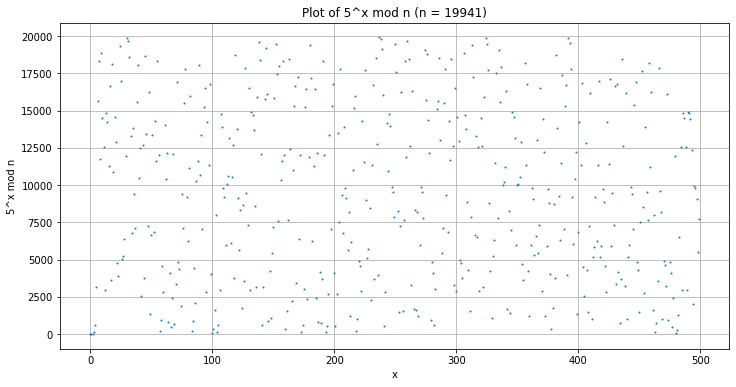

In [5]:
# ## 8. Plot a^x mod n to illustrate discrete logarithm hardness
import matplotlib.pyplot as plt

n=23*51*17
base = 5  # You can change this to another base (e.g., 2, 3, 7)
X = list(range(0, 500))
Y = [pow(base, x, n) for x in X]

plt.figure(figsize=(12, 6))
plt.plot(X, Y, '.', markersize=2)
plt.title(f"Plot of {base}^x mod n (n = {n})")
plt.xlabel("x")
plt.ylabel(f"{base}^x mod n")
plt.grid(True)
plt.show()


<strong> Why You Can’t Just Encrypt Arbitrarily Large Data?: 
RSA can only encrypt messages smaller than n. </strong>

If your message is larger:

You must split it into blocks smaller than  n.

Or better: use RSA to encrypt a symmetric key (like AES), and then encrypt the actual data with that key (hybrid encryption).

In [3]:
pip install rsa

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 4.2 MB/s eta 0:00:00
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [6]:
import rsa

# Key generation
public_key, private_key = rsa.newkeys(2048)

# Message
message = b"A un amigo perdido"

# Encryption
ciphertext = rsa.encrypt(message, public_key)

# Decryption
plaintext = rsa.decrypt(ciphertext, private_key)

print("Original:", message)
print("Encrypted:", ciphertext)
print("Decrypted:", plaintext)


Original: b'A un amigo perdido'
Encrypted: b'%U\xc8\xf5,\x1d\xd6!M\x00Z\xb3\xf1\\e\xcb\t\x1ei\x9d^\xc8\xe5W\xa1\xf3I\x03\xa9\xcb\xfd\xefHB\xa4\xd5\nG[|\xe3\xca\x81\x10_bX\x97:\x17\\\xbd\x8bW\xd4j\x8f\xf4\x8ao\xc7\xa9NWj\xbf\xc4x*\xb0\x91@\xa8\xff\x1al\xdc\xb9\xbc\xe9.I\x01\xceP\x94\x8b\ry3\xfcd`V\xf5\xbc\xbf\x7f\x06\xe4\xf6\xc9A3\xde\x96\x18\xe3\xb9\xab\xb7eQ\x86\xdb\t\xbeK\xea\x1fy\xccH\x00\x1f\xcb\xf47\xe6\x92\xef(>:\xa5{\x00\x08p\x06\xb70/\xeb\x80x\xe7\xf3\\\x1e\xa2\r"\x1c\xe8\x93;\xce\xe1\xa5\xb7\xb7[\x1f6\xffZ\x93\xe0\x84Rf\x19g\xf7\xf335q\xd2\x0c\xbf\x82Rs\xfeG\x0b`\xc6\x01\\\xfe\xc7s4<w\x8cHS\xaf8\xde"x\xca\x0e\x90-\xd5i\x10\xc0\xd5a\x06D/\xa3\xcf \xed\xf8\xde@\x1f\xe89\xf5\x90\xc3`3\x1a~ |)p+\xf5\x93\xd0\xf4K\xa2x.Y\x95\xaf\xb2?S\xf9'
Decrypted: b'A un amigo perdido'


In [ ]:
# Convert message to bytes
msg = "Hello, RSA!"
msg_bytes = msg.encode('utf-8')  # UTF-8 encoding

# Convert bytes to integer
m = int.from_bytes(msg_bytes, byteorder='big')

# Check size relative to n
if m >= n:
    raise ValueError("Message too long for the current RSA modulus.")


In [ ]:
# Convert decrypted int back to bytes
msg_len = (m.bit_length() + 7) // 8
msg_bytes = m.to_bytes(msg_len, byteorder='big')

# Decode bytes to string
original_msg = msg_bytes.decode('utf-8')